# libdvid: Basic functions

In [1]:
%matplotlib inline
import matplotlib.colors
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
import numpy as np
import vigra
from random import random
random_colors = [(1,1,1)] + [(random(),random(),random()) for i in xrange(255)]
random_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', random_colors, N=256)

In [2]:
from libdvid import DVIDNodeService

In [3]:
server_address = "127.0.0.1:8000"
uuid = "b9fdd"
node_service = DVIDNodeService(server_address, uuid)

## Store key/value data

In [4]:
keyvalue_store = "my-keyvalue"
node_service.create_keyvalue(keyvalue_store)
node_service.put(keyvalue_store, "City", "Ashburn")

# Get it back
node_service.get(keyvalue_store, "City")

'Ashburn'

## Fetch arbitrary grayscale regions

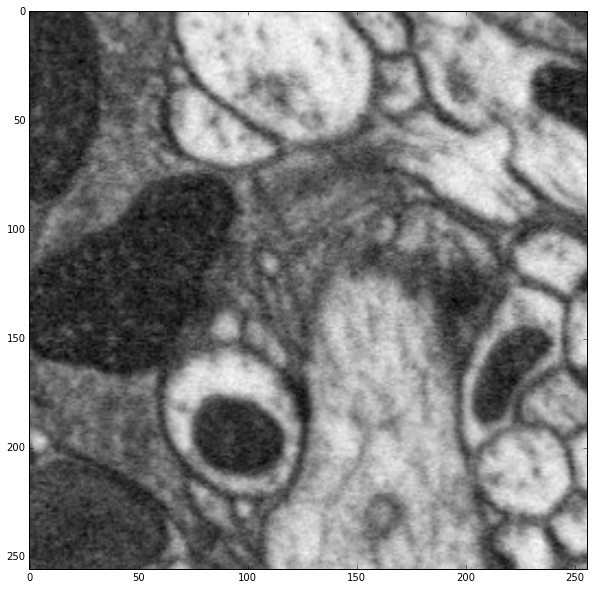

In [5]:
graycale_block = node_service.get_gray3D("grayscale", (64, 256, 256), (0,0,0))
plt.imshow(graycale_block[10], cmap='gray')

## Create a new label instance

In [6]:
label_instance_name = "mylabels"
node_service.create_labelblk(label_instance_name)

False

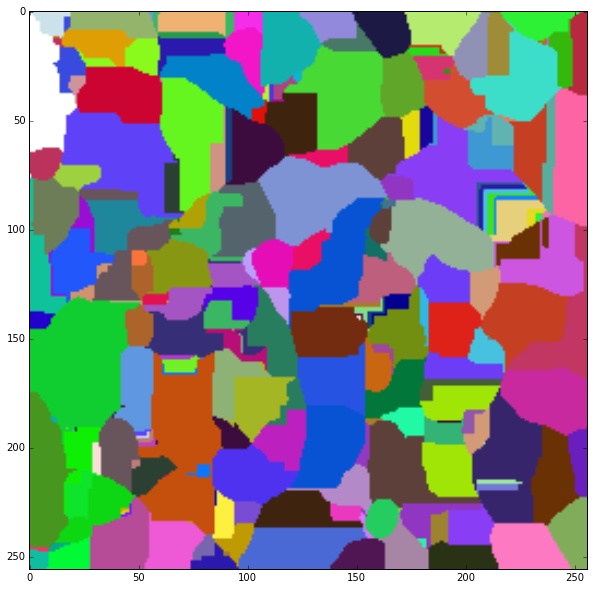

In [7]:
# Generate some demo labels
inverted_grayscale = (-1.0*graycale_block).astype(np.float32)
inverted_grayscale = vigra.filters.gaussianSmoothing(inverted_grayscale, 4.0)
watersheds, maxlabel = vigra.analysis.watershedsNew(inverted_grayscale)
plt.imshow(watersheds[10], cmap=random_cmap)

## Push/fetch label voxels

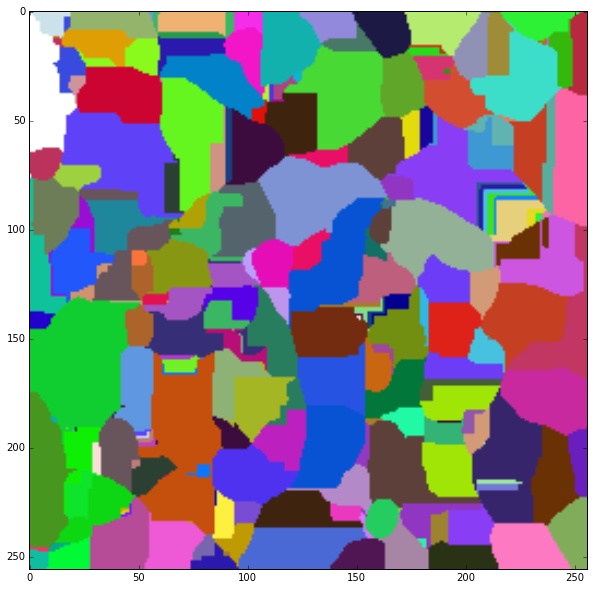

In [8]:
# Push to DVID
node_service.put_labels3D(label_instance_name, watersheds.astype(np.uint64), (0,0,0))

# Fetch a slice of it
fetched_label_slice = node_service.get_labels3D(label_instance_name, (1, 256, 256), (10,0,0))
plt.imshow(fetched_label_slice[0], cmap=random_cmap)

## Create a ROI

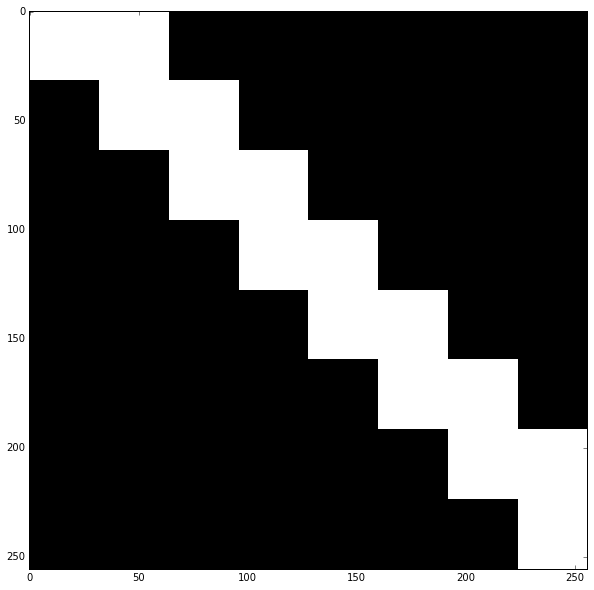

In [9]:
roi_name = "myroi"
node_service.create_roi(roi_name)

# ROIs are defined as a list of blocks.
# These are block indexes, not pixel coordinates.
roi_blocks = [(0,i,i) for i in range(8)]
roi_blocks += [(0,i,i+1) for i in range(8)]

# Push to dvid
node_service.post_roi(roi_name, roi_blocks)

# Fetch as slice of it in voxel space
roi_slice = node_service.get_roi3D(roi_name, (1, 256, 256), (10,0,0))
plt.imshow(roi_slice[0], cmap='gray', interpolation='nearest')

## Custom API calls

In [10]:
from libdvid import ConnectionMethod
endpoint = "/" + label_instance_name + "/info"
label_info = node_service.custom_request(endpoint, "", ConnectionMethod.GET)
print(label_info)

{"Base":{"TypeName":"labelblk","TypeURL":"github.com/janelia-flyem/dvid/datatype/labelblk","TypeVersion":"0.1","Name":"mylabels","RepoUUID":"b9fdd7a766c14d2390fc0540b1ed4811","Compression":"LZ4 compression, level -1","Checksum":"No checksum","Syncs":[],"Versioned":true},"Extended":{"Values":[{"DataType":"uint64","Label":"labelblk"}],"Interpolable":false,"BlockSize":[32,32,32],"VoxelSize":[8,8,8],"VoxelUnits":["nanometers","nanometers","nanometers"],"MinPoint":[0,0,0],"MaxPoint":[255,255,63],"MinIndex":[0,0,0],"MaxIndex":[7,7,1],"Background":0,"Labeling":0}}


In [11]:
import json
info_data = json.loads(label_info)
print(json.dumps(info_data, sort_keys=True,
                  indent=4, separators=(',', ': ')))


{
    "Base": {
        "Checksum": "No checksum",
        "Compression": "LZ4 compression, level -1",
        "Name": "mylabels",
        "RepoUUID": "b9fdd7a766c14d2390fc0540b1ed4811",
        "Syncs": [],
        "TypeName": "labelblk",
        "TypeURL": "github.com/janelia-flyem/dvid/datatype/labelblk",
        "TypeVersion": "0.1",
        "Versioned": true
    },
    "Extended": {
        "Background": 0,
        "BlockSize": [
            32,
            32,
            32
        ],
        "Interpolable": false,
        "Labeling": 0,
        "MaxIndex": [
            7,
            7,
            1
        ],
        "MaxPoint": [
            255,
            255,
            63
        ],
        "MinIndex": [
            0,
            0,
            0
        ],
        "MinPoint": [
            0,
            0,
            0
        ],
        "Values": [
            {
                "DataType": "uint64",
                "Label": "labelblk"
            }
        ],
   